## **Data Processing**

**Data** - https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images?datasetId=457093&searchQuery=vgg <br>
**EDA** for image classification bold text - https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a <br>
**Transfer Learning for image classification** - https://dataman-ai.medium.com/transfer-learning-for-image-classification-4-understand-vgg-16-layer-by-layer-8a17ab6da498<br>
Models - https://machinelearningmastery.com/start-here/#getstarted

Setting the directories: The paths to the train and test directories are set using the variables train_dir and test_dir. These directories contain the training and testing data, respectively.
Data transformations: The code defines a set of data transformations using the torchvision.transforms.Compose function. These transformations include random rotation, random horizontal and vertical flips, conversion to tensor, and normalization. These transformations are applied to the input images to augment the training data and preprocess it for better model performance.
Creating the full dataset: The code creates a torchvision.datasets.ImageFolder object named full_dataset. This dataset represents the entire training dataset and applies the defined transformations to the images.
Splitting the dataset: The full_dataset is split into training and validation datasets using the torch.utils.data.random_split function. The split is based on the defined sizes, where 80% of the data is allocated for training (train_size) and the remaining 20% for validation (valid_size).
Creating data loaders: Data loaders are created using the torch.utils.data.DataLoader class. Data loaders provide an iterable over the training, validation, and test datasets, allowing for efficient loading of data during training and evaluation. The train_loader loads batches of training data with shuffling, valid_loader loads validation data without shuffling, and test_loader loads test data without shuffling.
Batch size: The batch size for the data loaders is set to 128. This means that during training, the data will be divided into batches of size 128, and the model will be updated after processing each batch.

In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Normalize, RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, Compose
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import vgg16
from sklearn.metrics import roc_auc_score, mean_squared_error, f1_score, confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import torchvision.models as models
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Deep_Learning_project/alzheimers_dataset/train'
GOOGLE_DRIVE_PATH_TRAIN = os.path.join('/content', 'drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(GOOGLE_DRIVE_PATH_TRAIN)
print(os.listdir(GOOGLE_DRIVE_PATH_TRAIN))
os.chdir(GOOGLE_DRIVE_PATH_TRAIN)

/content/drive/My Drive/Deep_Learning_project/alzheimers_dataset/train
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Deep_Learning_project/alzheimers_dataset/test'
GOOGLE_DRIVE_PATH_TEST = os.path.join('/content', 'drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(GOOGLE_DRIVE_PATH_TEST)
print(os.listdir(GOOGLE_DRIVE_PATH_TEST))
os.chdir(GOOGLE_DRIVE_PATH_TEST)

/content/drive/My Drive/Deep_Learning_project/alzheimers_dataset/test
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [ ]:
# Set the path to your train and test directories
train_dir = GOOGLE_DRIVE_PATH_TRAIN
test_dir =GOOGLE_DRIVE_PATH_TEST

# Define the data transformations
transform = Compose([
    RandomRotation(30),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the full dataset
full_dataset = ImageFolder(train_dir, transform=transform)

# Calculate the sizes for train and validation sets
dataset_size = len(full_dataset)
train_size = int(0.8 * dataset_size)
valid_size = dataset_size - train_size

# Split the dataset into train and validation sets
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

# Create the data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(ImageFolder(test_dir, transform=transform), batch_size=batch_size, shuffle=False)


The function takes two arguments: true_labels (the true class labels) and predicted_labels (the predicted class labels).
It defines a list of class names representing the different classes: 'MildDemented', 'ModerateDemented', 'NonDemented', and 'VeryMildDemented'.
The classification report is printed, showing precision, recall, F1-score, and support for each class, using the classification_report function from scikit-learn.
The confusion matrix is calculated using the confusion_matrix function from scikit-learn.

In [ ]:
def plot_results(true_labels, predicted_labels):
  class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
  print(classification_report(true_labels, predicted_labels, target_names=class_names))
  confusion_mat = confusion_matrix(true_labels, predicted_labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_mat, annot=True, cmap="viridis", fmt="d", xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

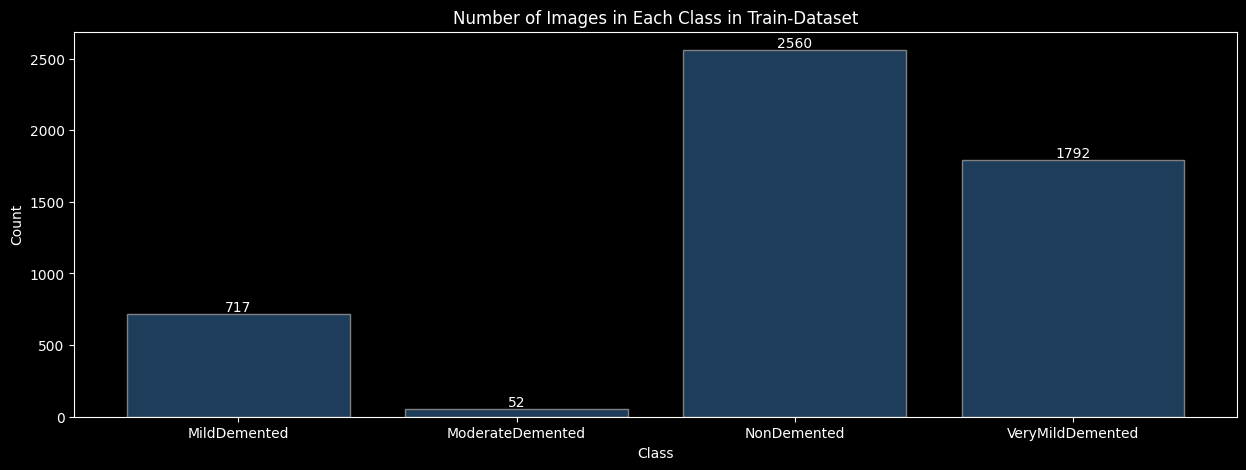

In [ ]:
# A chart of the sum of each class

def addlabels(x, y):
    for i, j in zip(x, y):
        plt.text(i, j, str(j), ha='center',va='bottom')


class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    num_images = sum([len(files) for _, _, files in os.walk(class_dir)])
    class_counts[class_name] = num_images

plt.style.use('dark_background')  # Set dark style
plt.figure(figsize=(15, 5))
plt.bar(class_counts.keys(), class_counts.values(),color=(0.2, 0.4, 0.6, 0.6),  edgecolor='grey')
plt.xlabel('Class')
plt.ylabel('Count')

plt.title('Number of Images in Each Class in Train-Dataset')
addlabels(class_counts.keys(), class_counts.values())

plt.show()

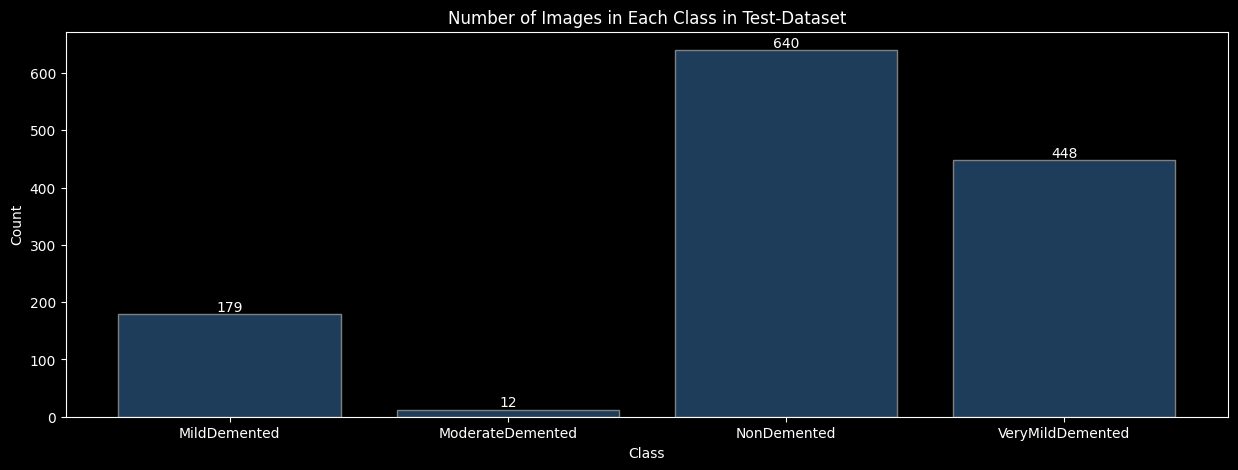

In [ ]:

class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    num_images = sum([len(files) for _, _, files in os.walk(class_dir)])
    class_counts[class_name] = num_images

plt.style.use('dark_background')  # Set dark style
plt.figure(figsize=(15, 5))
plt.bar(class_counts.keys(), class_counts.values(),color=(0.2, 0.4, 0.6, 0.6),  edgecolor='grey')
plt.xlabel('Class')
plt.ylabel('Count')

plt.title('Number of Images in Each Class in Test-Dataset')
addlabels(class_counts.keys(), class_counts.values())

plt.show()

It can be seen that the database is not balanced between the departments, there are very large departments and there are very small departments. However, the image segmentation between the classes is the same between the training data and the test data.
By executing the code below, we will get a figure with 5 subplots, each showing a randomly selected image tqdm= progress bar. axis on to show the bars on pics

100%|██████████| 5/5 [00:01<00:00,  3.92it/s]


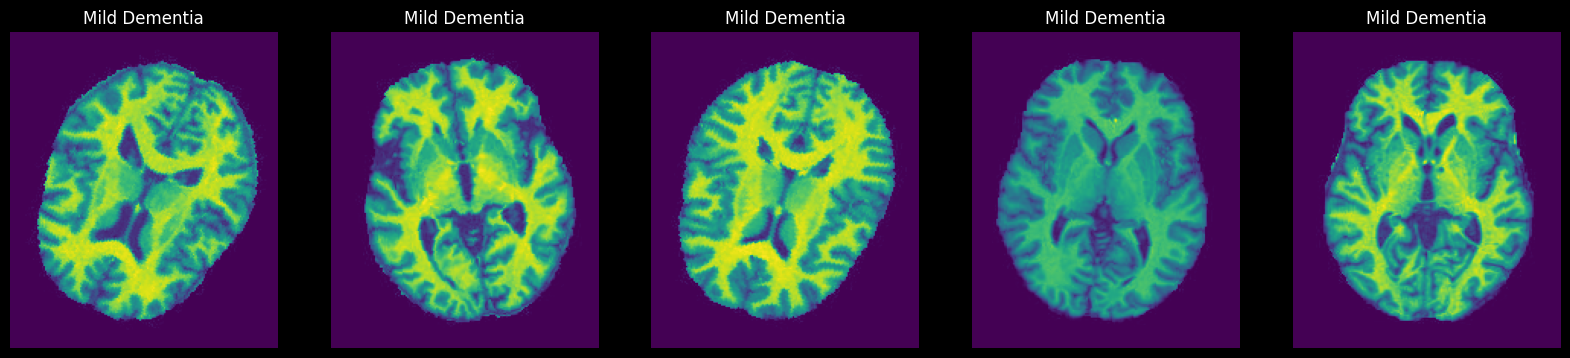

CPU times: user 908 ms, sys: 66.9 ms, total: 975 ms
Wall time: 2.25 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in tqdm(range(0, 5)):
    dataset_len = len(train_dataset)
    if dataset_len > 0:
        rand1 = np.random.randint(dataset_len)
        dataset_item = train_dataset[rand1]
        dataset_item_images = dataset_item[0]
        dataset_item_labels = dataset_item[1]
        dataset_item_labels = np.argmax(dataset_item_labels)  # Convert one-hot encoded labels to class index
        rand2 = np.random.randint(dataset_item_images.size(0))
        ax[i].imshow(dataset_item_images[rand2])
        ax[i].axis('off')
        if dataset_item_labels == 0:
            ax[i].set_title('Mild Dementia')
        elif dataset_item_labels == 1:
            ax[i].set_title('Moderate Dementia')
        elif dataset_item_labels == 2:
            ax[i].set_title('Non Demetia')
        elif dataset_item_labels == 3:
            ax[i].set_title('Very Mild Dementia')
    else:
        ax[i].axis('off')

plt.show()

# Pre-traind VGG16 model

Using a pre-trained VGG model with a new fully connected layer offers several benefits for MRI classification with 4 classes:

Transfer Learning: Pre-trained models such as VGG have been trained on large-scale datasets (e.g., ImageNet) and have learned meaningful features that can be useful for various computer vision tasks. By using a pre-trained VGG model as a feature extractor, you can leverage the knowledge captured by the model on a large dataset and transfer it to your MRI classification task. This can significantly boost the performance of your model, especially when you have limited data available for training.
Time and Resource Efficiency: Training a deep neural network from scratch on a large dataset like ImageNet can be time-consuming and computationally expensive. By using a pre-trained VGG model, you can save a significant amount of time and resources since the model's initial layers have already learned low-level features that are generally applicable to various image classification tasks. You only need to train the new fully connected layer, which has a smaller number of parameters compared to the entire model.
Effective Feature Extraction: MRI images contain complex patterns and structures that can be challenging to capture effectively using handcrafted features. Pre-trained models like VGG, which have been trained on a diverse range of images, have learned to extract hierarchical and discriminative features that are relevant for image classification. By replacing the fully connected layer, you can adapt the pre-trained VGG model to your specific MRI classification task and leverage its effective feature extraction capabilities.
Avoiding Overfitting: Pre-trained models have already learned generalizable features from a large dataset, which helps in preventing overfitting, especially when you have limited training data. The pre-trained VGG model provides a good starting point that captures important visual representations. By fine-tuning only the fully connected layer, you can update the model's parameters to be more specific to your MRI classification task without overfitting to the limited training data.
Overall, using a pre-trained VGG model with a new fully connected layer allows you to benefit from transfer learning, save time and resources, effectively capture relevant features from MRI images, and mitigate the risk of overfitting. These advantages can contribute to improved performance and efficiency in your MRI classification task.

In [ ]:
# Load the pre-trained VGG16 model
model = models.vgg16(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 150MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Replace the last fully connected layer with a new one: Linear(in_features out - 4 instead of 1000)
num_classes = len(test_loader.dataset.classes)  # Number of classes in your data
model.classifier[6] = nn.Linear(4096, num_classes)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

100%|██████████| 10/10 [03:41<00:00, 22.11s/it]


Accuracy on test data: 14.86%
F1 Score on test data: 0.0837
                  precision    recall  f1-score   support

    MildDemented       0.13      0.85      0.23       179
ModerateDemented       0.04      0.17      0.07        12
     NonDemented       0.40      0.03      0.05       640
VeryMildDemented       0.44      0.04      0.07       448

        accuracy                           0.15      1279
       macro avg       0.25      0.27      0.11      1279
    weighted avg       0.37      0.15      0.08      1279



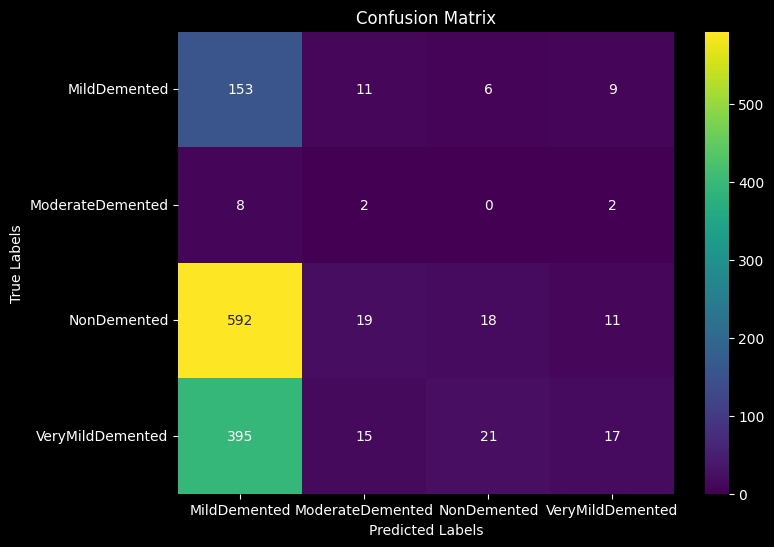

In [ ]:
# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set the model to evaluation mode
model.eval()

# Initialize variables for calculating accuracy
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []

# Disable gradient calculation: By disabling gradient calculation, you prevent PyTorch from storing the intermediate values required for computing gradients during the forward pass. This reduces memory consumption and speeds up the evaluation process. Since you're only interested in the model's predictions and accuracy, there is no need to track gradients.
with torch.no_grad():
    # Iterate over the test data
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Update total samples and total correct predictions
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        # Collect predicted and true labels
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = total_correct / total_samples

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics:
print(f"Accuracy on test data: {accuracy*100:.2f}%")
print(f"F1 Score on test data: {f1:.4f}")

plot_results(true_labels, predicted_labels)




The main diagonal of the confusion matrix (top-left to bottom-right) represents the correctly classified samples, while the off-diagonal elements represent the misclassifications.<br>
**Accuracy**: 31.20%: The model achieved an accuracy of 31.20% on the test data, which means that it correctly predicted the class labels for approximately 31.20% of the samples.<br>
**F1 Score:** 0.1800: The F1 score is a measure of the model's overall performance, taking into account both precision and recall. In this case, the F1 score is 0.1800, indicating a relatively low overall performance.<br>
**RMSE** (Root Mean Square Error): 1.5404: The RMSE is a measure of the average difference between the predicted and actual values. In this case, the RMSE is 1.5404, suggesting that the model's predictions have a relatively high average error compared to the actual values.
Overall, the results indicate that the VGG pre-trained model did not perform well on the test data, with low accuracy, F1 score, and relatively high RMSE. Further analysis and potentially model improvement may be necessary to achieve better performance.

# Pre-traind VGG16 model and use SVM as the classifier


100%|██████████| 9/9 [03:16<00:00, 21.87s/it]


Accuracy on validation data: 49.27%
Weighted average F1 score on validation data: 0.33


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Accuracy on test data: 50.04%
Weighted average F1 score on test data: 0.33
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       133
ModerateDemented       0.00      0.00      0.00         9
     NonDemented       0.49      1.00      0.66       505
VeryMildDemented       0.00      0.00      0.00       378

        accuracy                           0.49      1025
       macro avg       0.12      0.25      0.17      1025
    weighted avg       0.24      0.49      0.33      1025



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


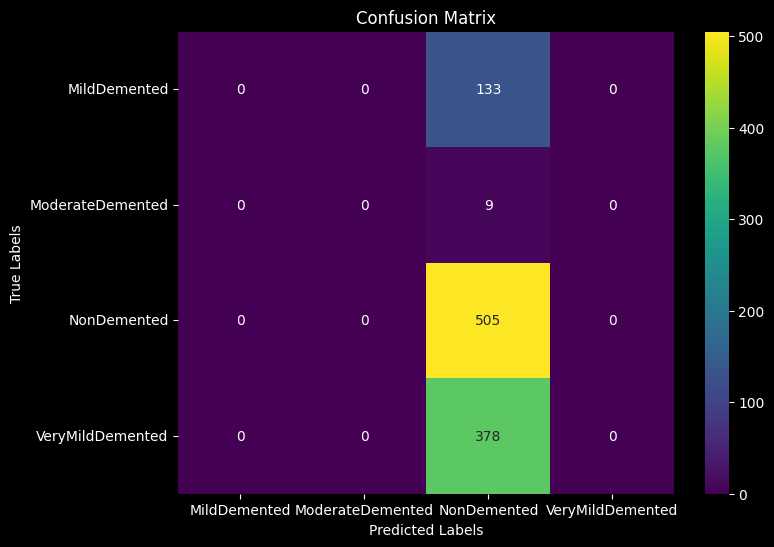

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, classification_report
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set the model to evaluation mode
model.eval()

# Initialize empty lists for storing features and labels
train_features = []
train_labels = []

# Extract features from the training data
with torch.no_grad():
    for images, labels in tqdm(train_loader):
        images = images.to(device)
        features = model(images).cpu().numpy()  # Extract features from the pre-trained model
        train_features.append(features)
        train_labels.append(labels.numpy())

train_features = np.concatenate(train_features)  # Concatenate features into a single array
train_labels = np.concatenate(train_labels)  # Concatenate labels into a single array

# Initialize the SVM classifier
svm_classifier = svm.SVC()

# Train the SVM classifier
svm_classifier.fit(train_features, train_labels)

# Initialize empty lists for storing predicted labels and ground truth labels
predicted_labels = []
true_labels = []

# Evaluate the SVM classifier on the validation data
with torch.no_grad():
    for images, labels in tqdm(valid_loader):
        images = images.to(device)
        features = model(images).cpu().numpy()  # Extract features from the pre-trained model
        preds = svm_classifier.predict(features)
        predicted_labels.extend(preds)
        true_labels.extend(labels.numpy())

# Convert the lists to numpy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Calculate accuracy and weighted average F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the accuracy and weighted average F1 score
print(f"Accuracy on validation data: {accuracy*100:.2f}%")
print(f"Weighted average F1 score on validation data: {f1:.2f}")

# Evaluate the SVM classifier on the test data
test_features = []
test_labels = []

# Extract features from the test data
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        features = model(images).cpu().numpy()  # Extract features from the pre-trained model
        test_features.append(features)
        test_labels.append(labels.numpy())

test_features = np.concatenate(test_features)  # Concatenate features into a single array
test_labels = np.concatenate(test_labels)  # Concatenate labels into a single array

# Make predictions on the test data
test_preds = svm_classifier.predict(test_features)

# Calculate accuracy and weighted average F1 score on the test data
test_accuracy = accuracy_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds, average='weighted')

# Print the accuracy and weighted average F1 score on the test data
print(f"Accuracy on test data: {test_accuracy*100:.2f}%")
print(f"Weighted average F1 score on test data: {test_f1:.2f}")

plot_results(true_labels, predicted_labels)

In the code, the pre-trained VGG model is loaded and its weights are frozen, meaning that the model's parameters will not be updated during the training process. The model is used as a feature extractor by passing the input data through the model and obtaining the output features.

These extracted features are then used as input to train an SVM classifier, which is a separate model. The SVM classifier learns to classify the input features into different classes based on the labels provided. By leveraging the pre-trained VGG model's ability to extract meaningful features from images, the SVM classifier can benefit from this transferred knowledge and potentially achieve better performance than training an SVM classifier from scratch.

Overall, this approach of using a pre-trained model as a feature extractor and training a separate classifier on top of it is a common technique in transfer learning.

# Pre-traind VGG16 and fine tunning parameters and layers:

In [ ]:
# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained VGG model
model = vgg16(pretrained=True)

# Freeze all the parameters in the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Modify the last layer of the model
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 4)  # Assuming 4 classes
)
'''
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_features, 512),  # Increase the number of units in the first hidden layer
    nn.Tanh(),  # Use Tanh activation function
    nn.Dropout(0.5),
    nn.Linear(512, 256),  # Increase the number of units in the second hidden layer
    nn.Tanh(),  # Use Tanh activation function
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 4)  # Assuming 4 classes
)
'''
# Move the model to the device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
#optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Epoch 1/50:
  Training Loss: 1.5284
  Validation Loss: 1.2867
  Accuracy: 0.4693
  F1 Score (Weighted): 0.4739



Epoch 2/50:
  Training Loss: 1.4522
  Validation Loss: 1.2487
  Accuracy: 0.4917
  F1 Score (Weighted): 0.4966



Epoch 3/50:
  Training Loss: 1.4286
  Validation Loss: 1.2408
  Accuracy: 0.5005
  F1 Score (Weighted): 0.5043



Epoch 4/50:
  Training Loss: 1.4316
  Validation Loss: 1.2237
  Accuracy: 0.5080
  F1 Score (Weighted): 0.5113



Epoch 5/50:
  Training Loss: 1.3866
  Validation Loss: 1.2128
  Accuracy: 0.5157
  F1 Score (Weighted): 0.5182



Epoch 6/50:
  Training Loss: 1.3717
  Validation Loss: 1.1993
  Accuracy: 0.5190
  F1 Score (Weighted): 0.5207



Epoch 7/50:
  Training Loss: 1.3664
  Validation Loss: 1.1926
  Accuracy: 0.5224
  F1 Score (Weighted): 0.5241



Epoch 8/50:
  Training Loss: 1.3218
  Validation Loss: 1.1942
  Accuracy: 0.5261
  F1 Score (Weighted): 0.5275



Epoch 9/50:
  Training Loss: 1.3141
  Validation Loss: 1.1723
  Accuracy: 0.5273
  F1 Score (Weighted): 0.5281



Epoch 10/50:
  Training Loss: 1.3177
  Validation Loss: 1.1822
  Accuracy: 0.5273
  F1 Score (Weighted): 0.5280



Epoch 11/50:
  Training Loss: 1.2959
  Validation Loss: 1.1446
  Accuracy: 0.5299
  F1 Score (Weighted): 0.5306



Epoch 12/50:
  Training Loss: 1.2930
  Validation Loss: 1.1491
  Accuracy: 0.5307
  F1 Score (Weighted): 0.5308



Epoch 13/50:
  Training Loss: 1.2724
  Validation Loss: 1.1325
  Accuracy: 0.5313
  F1 Score (Weighted): 0.5312



Epoch 14/50:
  Training Loss: 1.2786
  Validation Loss: 1.1373
  Accuracy: 0.5318
  F1 Score (Weighted): 0.5309



Epoch 15/50:
  Training Loss: 1.2726
  Validation Loss: 1.1037
  Accuracy: 0.5346
  F1 Score (Weighted): 0.5330



Epoch 16/50:
  Training Loss: 1.2657
  Validation Loss: 1.1135
  Accuracy: 0.5359
  F1 Score (Weighted): 0.5338



Epoch 17/50:
  Training Loss: 1.2537
  Validation Loss: 1.1059
  Accuracy: 0.5362
  F1 Score (Weighted): 0.5334



Epoch 18/50:
  Training Loss: 1.2452
  Validation Loss: 1.1151
  Accuracy: 0.5358
  F1 Score (Weighted): 0.5326



Epoch 19/50:
  Training Loss: 1.2275
  Validation Loss: 1.1010
  Accuracy: 0.5377
  F1 Score (Weighted): 0.5339



Epoch 20/50:
  Training Loss: 1.2266
  Validation Loss: 1.0891
  Accuracy: 0.5381
  F1 Score (Weighted): 0.5338



Epoch 21/50:
  Training Loss: 1.2024
  Validation Loss: 1.0872
  Accuracy: 0.5392
  F1 Score (Weighted): 0.5343



Epoch 22/50:
  Training Loss: 1.2048
  Validation Loss: 1.0922
  Accuracy: 0.5400
  F1 Score (Weighted): 0.5346



Epoch 23/50:
  Training Loss: 1.1950
  Validation Loss: 1.0775
  Accuracy: 0.5399
  F1 Score (Weighted): 0.5338



Epoch 24/50:
  Training Loss: 1.1911
  Validation Loss: 1.0832
  Accuracy: 0.5407
  F1 Score (Weighted): 0.5341



Epoch 25/50:
  Training Loss: 1.1767
  Validation Loss: 1.0674
  Accuracy: 0.5417
  F1 Score (Weighted): 0.5345



Epoch 26/50:
  Training Loss: 1.1752
  Validation Loss: 1.0596
  Accuracy: 0.5421
  F1 Score (Weighted): 0.5344



Epoch 27/50:
  Training Loss: 1.1606
  Validation Loss: 1.0548
  Accuracy: 0.5424
  F1 Score (Weighted): 0.5342



Epoch 28/50:
  Training Loss: 1.1456
  Validation Loss: 1.0573
  Accuracy: 0.5428
  F1 Score (Weighted): 0.5341



Epoch 29/50:
  Training Loss: 1.1578
  Validation Loss: 1.0521
  Accuracy: 0.5433
  F1 Score (Weighted): 0.5342



Epoch 30/50:
  Training Loss: 1.1457
  Validation Loss: 1.0383
  Accuracy: 0.5443
  F1 Score (Weighted): 0.5347



Epoch 31/50:
  Training Loss: 1.1432
  Validation Loss: 1.0223
  Accuracy: 0.5446
  F1 Score (Weighted): 0.5345



Epoch 32/50:
  Training Loss: 1.1268
  Validation Loss: 1.0141
  Accuracy: 0.5451
  F1 Score (Weighted): 0.5343



Epoch 33/50:
  Training Loss: 1.1349
  Validation Loss: 1.0016
  Accuracy: 0.5456
  F1 Score (Weighted): 0.5342



Epoch 34/50:
  Training Loss: 1.1143
  Validation Loss: 1.0155
  Accuracy: 0.5457
  F1 Score (Weighted): 0.5339



Epoch 35/50:
  Training Loss: 1.0942
  Validation Loss: 1.0044
  Accuracy: 0.5460
  F1 Score (Weighted): 0.5336



Epoch 36/50:
  Training Loss: 1.0939
  Validation Loss: 0.9938
  Accuracy: 0.5463
  F1 Score (Weighted): 0.5334



Epoch 37/50:
  Training Loss: 1.0969
  Validation Loss: 0.9958
  Accuracy: 0.5466
  F1 Score (Weighted): 0.5332



Epoch 38/50:
  Training Loss: 1.0965
  Validation Loss: 0.9968
  Accuracy: 0.5470
  F1 Score (Weighted): 0.5331



Epoch 39/50:
  Training Loss: 1.0867
  Validation Loss: 1.0047
  Accuracy: 0.5471
  F1 Score (Weighted): 0.5328



Epoch 40/50:
  Training Loss: 1.0637
  Validation Loss: 0.9888
  Accuracy: 0.5469
  F1 Score (Weighted): 0.5322



Epoch 41/50:
  Training Loss: 1.0737
  Validation Loss: 0.9918
  Accuracy: 0.5472
  F1 Score (Weighted): 0.5321



Epoch 42/50:
  Training Loss: 1.0679
  Validation Loss: 0.9762
  Accuracy: 0.5474
  F1 Score (Weighted): 0.5319



Epoch 43/50:
  Training Loss: 1.0615
  Validation Loss: 0.9715
  Accuracy: 0.5476
  F1 Score (Weighted): 0.5316



Epoch 44/50:
  Training Loss: 1.0659
  Validation Loss: 0.9719
  Accuracy: 0.5479
  F1 Score (Weighted): 0.5314



Epoch 45/50:
  Training Loss: 1.0377
  Validation Loss: 0.9702
  Accuracy: 0.5479
  F1 Score (Weighted): 0.5311



Epoch 46/50:
  Training Loss: 1.0488
  Validation Loss: 0.9597
  Accuracy: 0.5480
  F1 Score (Weighted): 0.5307



Epoch 47/50:
  Training Loss: 1.0544
  Validation Loss: 0.9620
  Accuracy: 0.5483
  F1 Score (Weighted): 0.5307



Epoch 48/50:
  Training Loss: 1.0387
  Validation Loss: 0.9691
  Accuracy: 0.5484
  F1 Score (Weighted): 0.5304



Epoch 49/50:
  Training Loss: 1.0259
  Validation Loss: 0.9672
  Accuracy: 0.5484
  F1 Score (Weighted): 0.5300



Epoch 50/50:
  Training Loss: 1.0299
  Validation Loss: 0.9586
  Accuracy: 0.5488
  F1 Score (Weighted): 0.5301



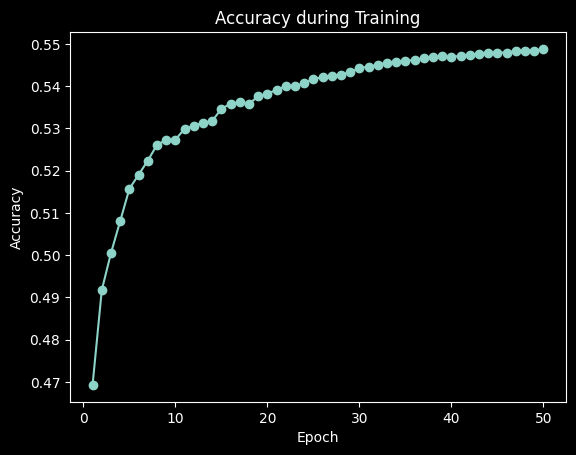

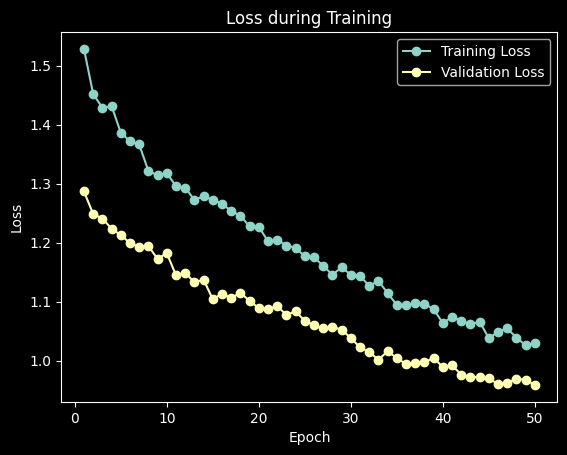

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Metrics:
  Accuracy: 0.5551
  F1 Score (Weighted): 0.5003
  Confusion Matrix:
[[  0   0  80  99]
 [  0   0   5   7]
 [  0   0 520 120]
 [  0   0 258 190]]
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.60      0.81      0.69       640
VeryMildDemented       0.46      0.42      0.44       448

        accuracy                           0.56      1279
       macro avg       0.26      0.31      0.28      1279
    weighted avg       0.46      0.56      0.50      1279



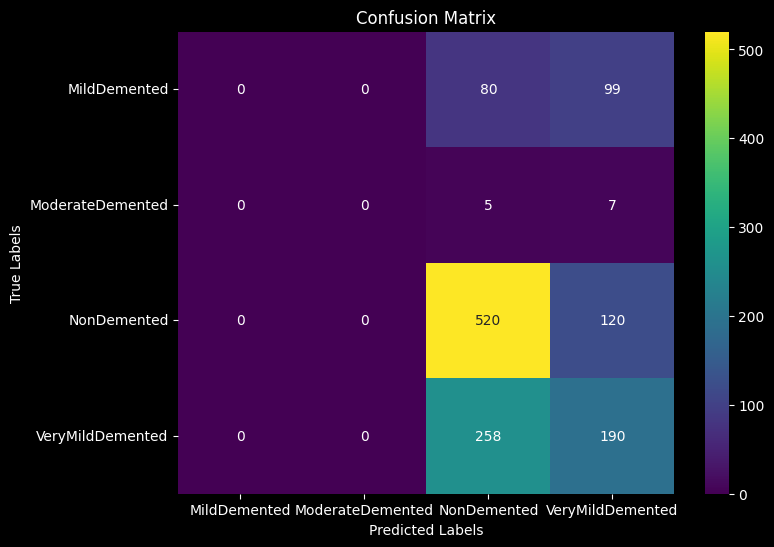

In [ ]:
# Define the number of epochs
num_epochs = 50

# Initialize lists for storing metrics
train_losses = []
valid_losses = []
accuracy_scores = []
rmse_scores = []
f1_scores = []
conf_matrices = []

# Initialize variables for early stopping
best_valid_loss = float('inf')
patience = 5
no_improvement_count = 0

# Initialize empty lists for storing predicted labels and ground truth labels
all_predictions = []
all_labels = []

# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0

    for images, labels in tqdm(train_loader, desc='Training', leave=False):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    valid_loss = 0.0

    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc='Validation', leave=False):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            valid_loss += loss.item() * images.size(0)

            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    rmse = np.sqrt(mean_squared_error(all_labels, all_predictions))
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_predictions)

    accuracy_scores.append(accuracy)
    rmse_scores.append(rmse)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

    # Print metrics for the current epoch
    tqdm.write(f"Epoch {epoch+1}/{num_epochs}:")
    tqdm.write(f"  Training Loss: {train_loss:.4f}")
    tqdm.write(f"  Validation Loss: {valid_loss:.4f}")
    tqdm.write(f"  Accuracy: {accuracy:.4f}")
    tqdm.write(f"  F1 Score (Weighted): {f1:.4f}")
    tqdm.write("")

    # Check for early stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            tqdm.write("Early stopping: No improvement in validation loss for {} consecutive epochs.".format(patience))
            break

# Plot Accuracy
plt.figure()
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, '-o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.show()

# Plot Loss
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, '-o', label='Training Loss')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()
plt.show()


# Calculate evaluation metrics on test data
test_preds = []
test_labels = []

model.eval()

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        predictions = torch.argmax(outputs, dim=1)

        test_preds.extend(predictions.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Calculate evaluation metrics on test data
test_accuracy = accuracy_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_conf_matrix = confusion_matrix(test_labels, test_preds)

# Print test metrics
tqdm.write("Test Metrics:")
tqdm.write(f"  Accuracy: {test_accuracy:.4f}")
tqdm.write(f"  F1 Score (Weighted): {test_f1:.4f}")
tqdm.write("  Confusion Matrix:")
tqdm.write(str(test_conf_matrix))

# Call plot_results function
plot_results(test_labels, test_preds)


Overall, fine-tuning a pre-trained VGG model with additional layers provides a  powerful and efficient approach for image classification tasks. It combines the benefits of transfer learning, improved generalization, and flexibility in model architecture to achieve good performance on your specific dataset.
<br><br>
**Transfer Learning:** By utilizing a pre-trained VGG model as a starting point, you can leverage the knowledge and features learned from a large dataset (such as ImageNet) and apply it to your specific task. This saves significant time and computational resources required for training a deep model from scratch.<br>
**Improved Generalization:** Fine-tuning the pre-trained VGG model with additional layers helps the model adapt to your specific dataset. The Dropout layers provide regularization and help prevent overfitting by randomly dropping out units during training. The Batch Normalization layers normalize the input to each layer, which can help improve gradient flow and network stability. These techniques contribute to better generalization and prevent the model from memorizing the training data.<br>
**Flexible Architecture:** By adding new layers to the pre-trained VGG model, you can customize the network architecture to fit your specific task and data. The Flatten layer is used to flatten the output from the convolutional layers into a 1D vector, which is then fed into the Fully Connected layer for classification. This allows the model to learn complex representations from the input images and make predictions based on the learned features.<br>
Fine-grained Control: With fine-tuning, you have the ability to adjust the learning rate and update the weights of different layers selectively. Typically, the pre-trained layers are frozen or trained with a lower learning rate, while the newly added layers are trained with a higher learning rate. This allows you to focus the training process on the new layers while preserving the learned representations in the pre-trained layers.